In [1]:
from analyseData import curvefitting as cf
import pandas as pd
from analyseData import loadData as ld

c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


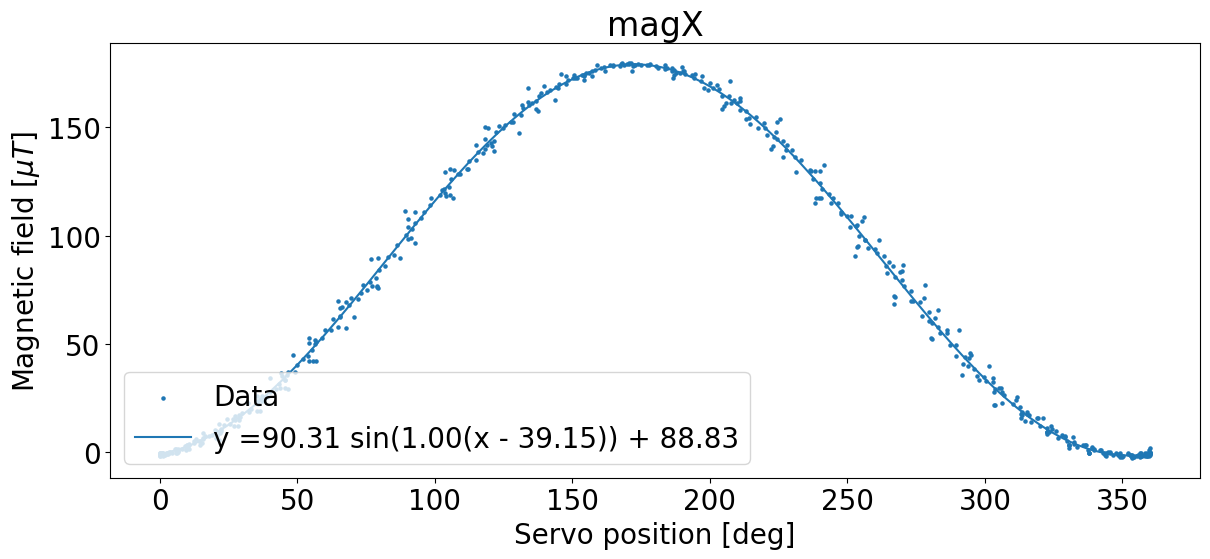

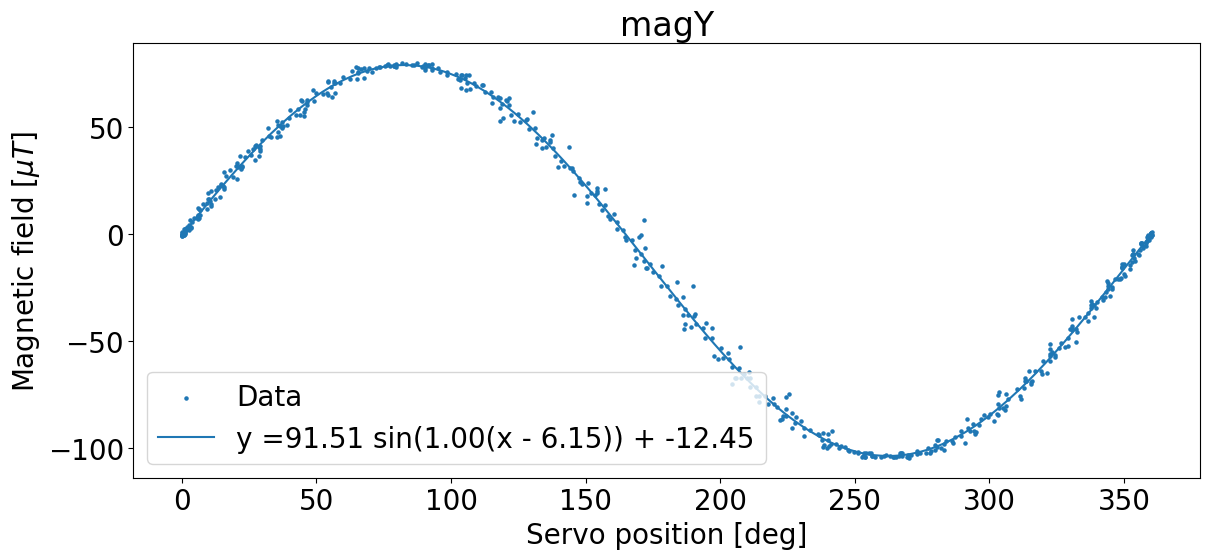

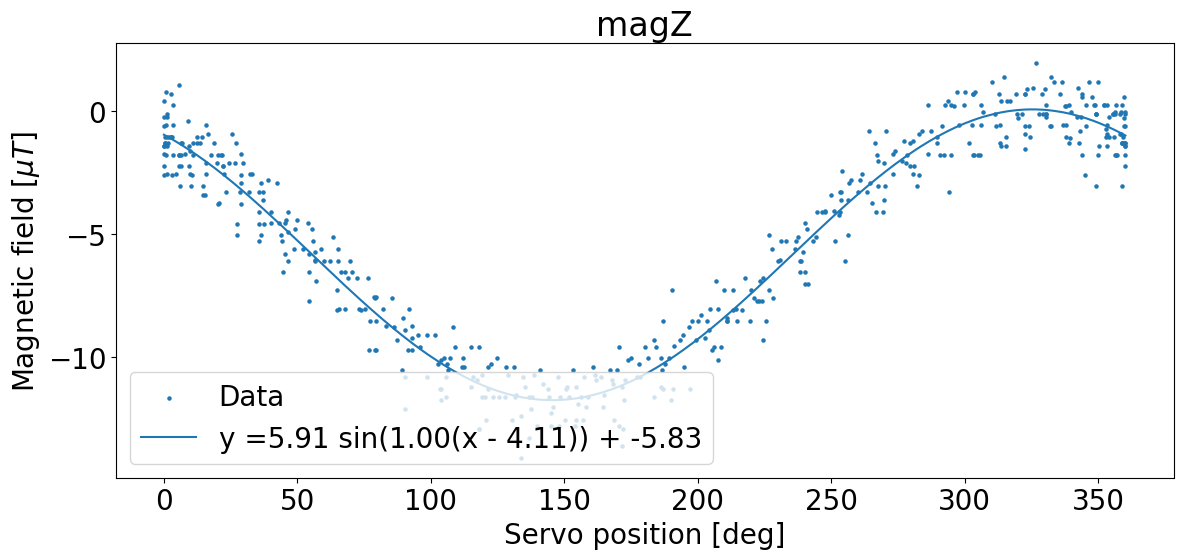

In [2]:
def estimate_sine_params(df_IMU, df_servo, savefig = False, directory = None):
    df_mag_servo = df_servo.copy()
    
    df_mag_servo['magX'] = df_mag_servo['magX']  - df_IMU['magX'].mean() 
    df_mag_servo['magY'] = df_mag_servo['magY']  - df_IMU['magY'].mean() 
    df_mag_servo['magZ'] = df_mag_servo['magZ']  - df_IMU['magZ'].mean() 
    params = cf.fit_magnetometer_data(df_mag_servo)
    cf.plot_magsinefit(df_mag_servo, params)


                    
#MatchAndSaveMagPosData()
df_true_IMU = ld.laodTestData("Data/projectThesisTest1/newCurrentMeas/woLoad/pureIMUdata2023-05-16 09%3A22%3A14.928527.csv") 
df_true_IMU = df_true_IMU.dropna()
df_servo = pd.read_csv("Data/AspenDataFiles/woLoad/NEWservoData2023-05-16woLoadTranslatedOutliersRemoved.csv", sep = ',', header=0, index_col=False) 
df_servo = df_servo.dropna()
estimate_sine_params(df_true_IMU, df_servo, savefig = False, directory = "Data/projectThesisTest1/newCurrentMeas/woLoad")

# With load


c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


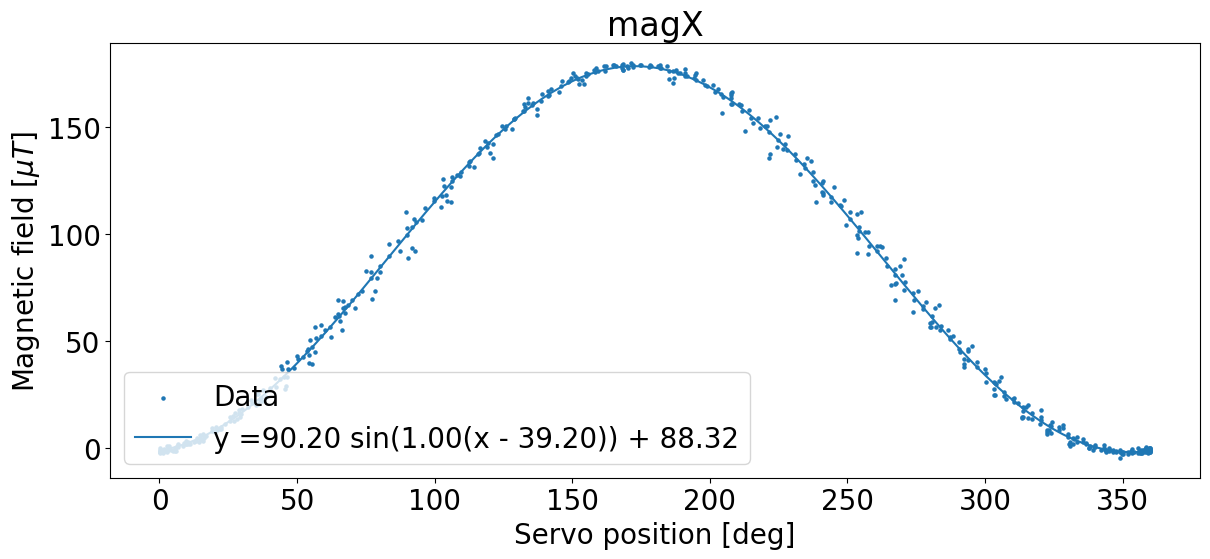

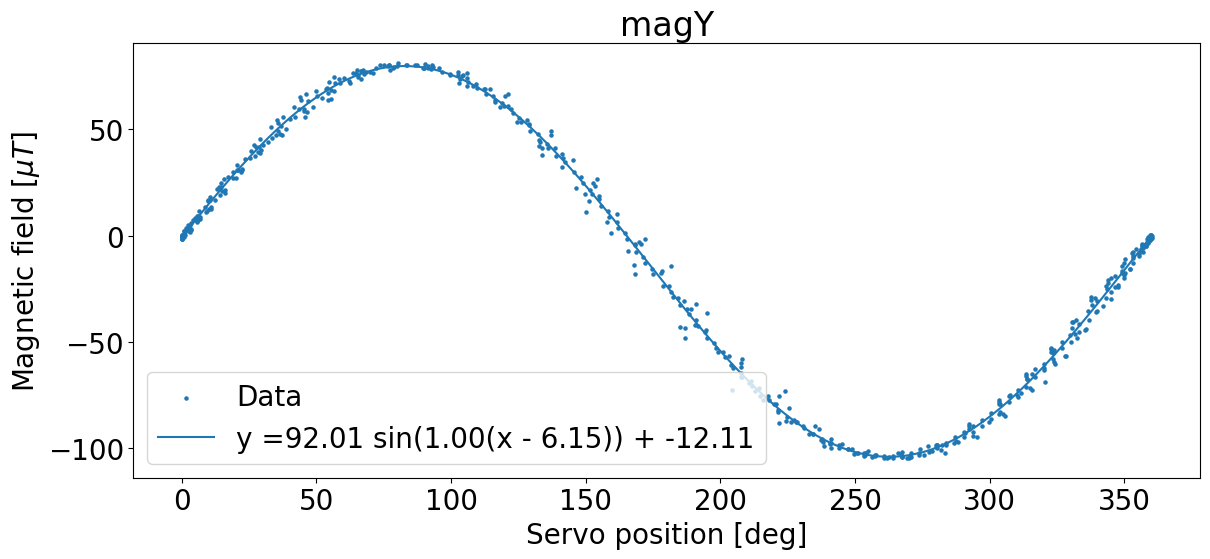

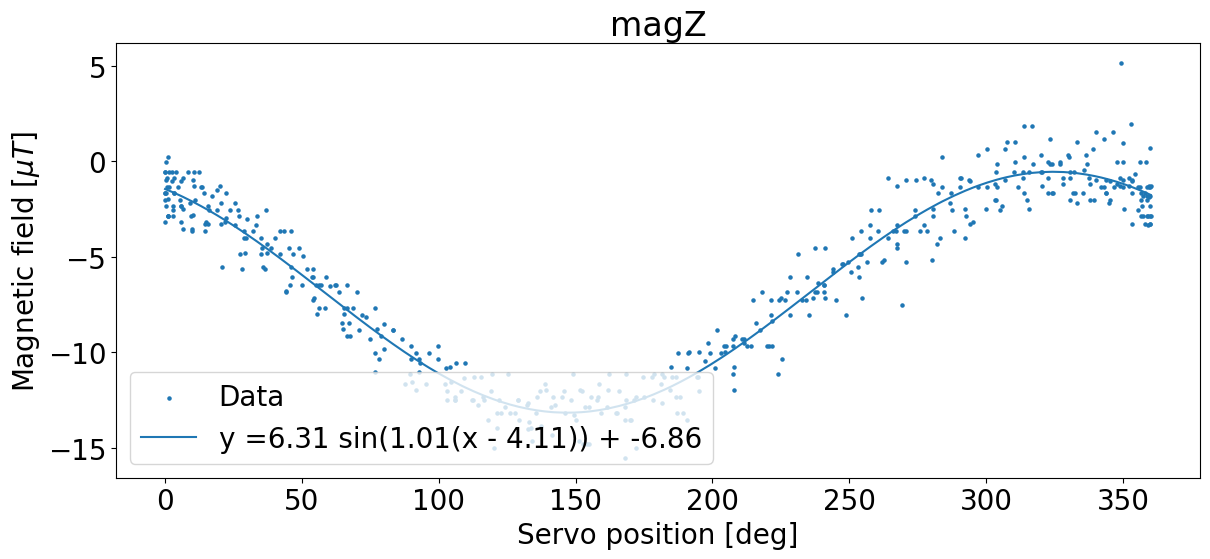

In [3]:
df_true_IMU = ld.laodTestData("Data/projectThesisTest1/newCurrentMeas/wLoad/pureIMUdata2023-05-16 08%3A46%3A23.906719.csv")
df_true_IMU = df_true_IMU.dropna()
df_servo = pd.read_csv("Data/AspenDataFiles/wLoad/NEWservoDataWithLoadTranslatedOutliersRemoved.csv", sep = ',', header=0, index_col=False) 
df_servo = df_servo.dropna()
estimate_sine_params(df_true_IMU, df_servo, savefig = False, directory="Data/projectThesisTest1/newCurrentMeas/wLoad")